In [1]:
import os
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator

%matplotlib inline  

COLORS = ['firebrick', 'darkred', 'orange', 'darkorange', 'gold', 'goldenrod', 
         'yellowgreen', 'olivedrab', 'forestgreen', 'darkgreen', 'lightseagreen', 'teal', 'deepskyblue',
         'dodgerblue', 'mediumpurple', 'rebeccapurple', 'plum', 'orchid']

2022-10-31 16:11:31.364677: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-31 16:11:31.473203: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-31 16:11:31.917152: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-31 16:11:31.917231: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [3]:
root = "/home/n31v/workspace/runs"

In [4]:
def get_scores(file):
    scores = {
        "abs(e)/size": [],
        "abs(e)/f1": [],        
        "percentage(e)/size": [],
        "percentage(e)/number_of_params": [],
        "percentage(e)/inference_time": [],
        "percentage(e)/f1": [],
        "percentage(e)/roc_auc": [],  
        "delta(e)/f1": [],
        "delta(e)/roc_auc": [],
        "delta(e)/accuracy": [],
        "delta(e)/map_50": [],
        "delta(e)/map": [],
    }
    for e in summary_iterator(file):
        for v in e.summary.value:
            if v.tag in scores.keys():
                scores[v.tag].append(v.simple_value)
    return scores

In [5]:
def plot_scores(exps_list, score_x, score_y, min_y=0):
    plt.figure(figsize=(10,5)) 
    plt.grid()
    plt.xlabel(score_x)
    plt.ylabel(score_y)
    for i, (exp, scores) in enumerate(exps_list):
        n = next(i for i, y in enumerate(scores[score_y]) if y > min_y)
        plt.plot(scores[score_x][n:], scores[score_y][n:], label=exp, color=COLORS[i]);
    plt.legend();

In [6]:
case = "CIFAR10"
exps = sorted(os.listdir(os.path.join(root, case)))

exps_list = []
for exp in exps:
    if exp.endswith("fine_tuned") or exp.endswith("pruned"):
        tmp = os.listdir(os.path.join(root, case, exp))
        assert len(tmp) == 1, exp
        file = tmp[0]
        scores = get_scores(os.path.join(root, case, exp, file))
        print(exp)
        exps_list.append((exp, scores))

FileNotFoundError: [Errno 2] No such file or directory: '/home/n31v/workspace/runs/ALET/FasterRCNN'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


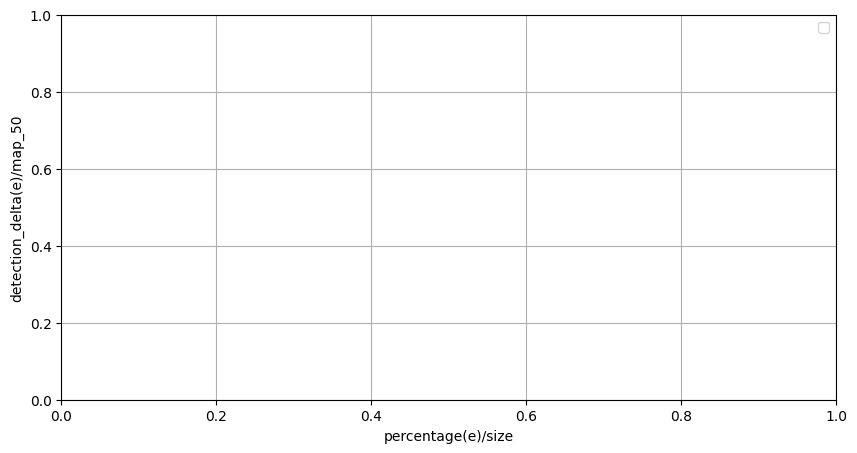

In [13]:
plot_scores(exps_list, "percentage(e)/size", "delta(e)/map_50", min_y=-0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


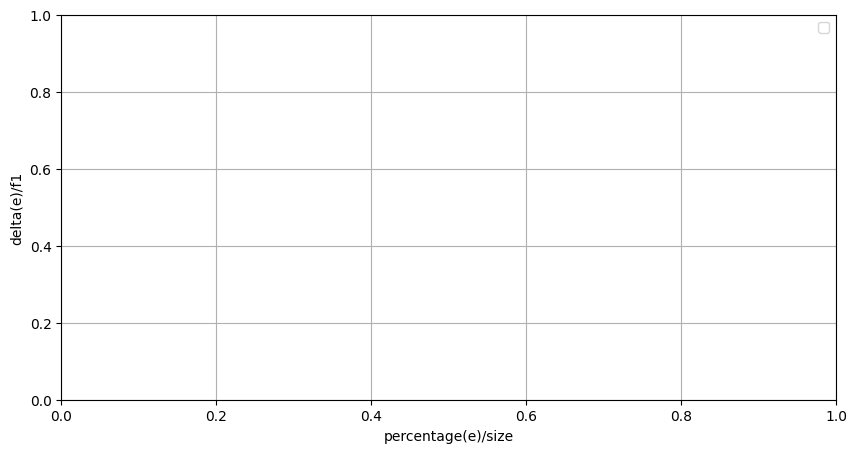

In [13]:
plot_scores(exps_list, "percentage(e)/size", "delta(e)/f1", min_y=-0.05)

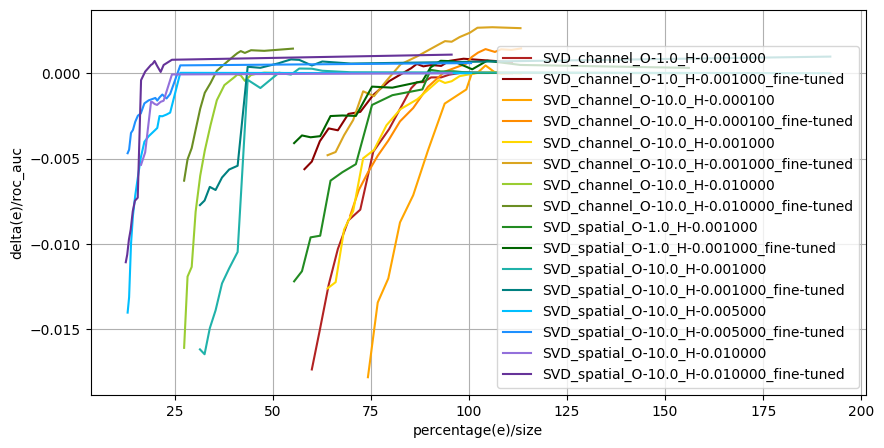

In [21]:
plot_scores(exps_list, "percentage(e)/size", "delta(e)/roc_auc", min_y=-0.02)

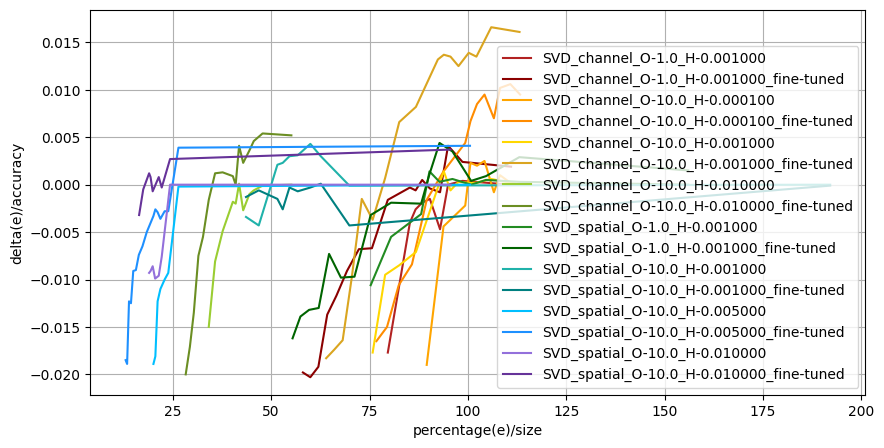

In [22]:
plot_scores(exps_list, "percentage(e)/size", "delta(e)/accuracy", min_y=-0.02)

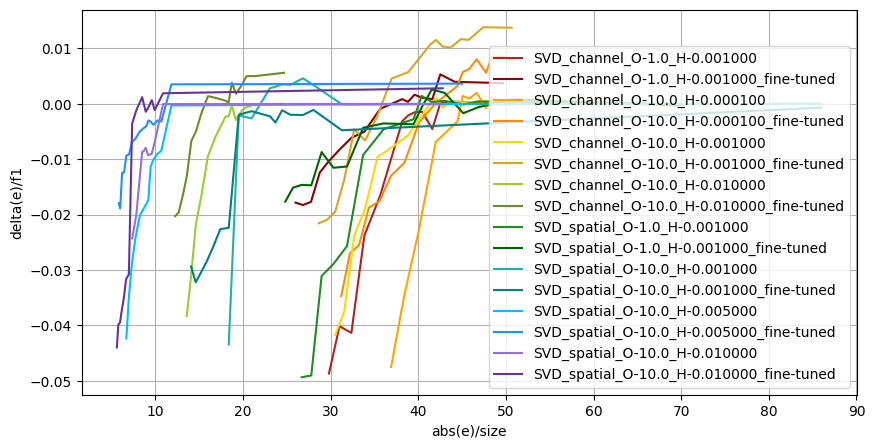

In [23]:
plot_scores(exps_list, "abs(e)/size", "delta(e)/f1", min_y=-0.05)